In [55]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
data_dir = "D:\DEEPRA_096\FullIJCNN2013\FullIJCNN2013"

In [13]:
ground_truth = pd.read_csv("D:\DEEPRA_096\FullIJCNN2013\FullIJCNN2013\gt.csv",header=None)
ground_truth.head()

,0,1,2,3,4,5
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39


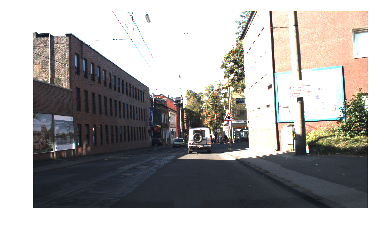

In [33]:
image = Image.open('D:/DEEPRA_096/FullIJCNN2013/FullIJCNN2013/00000.ppm')

plt.imshow(image)
plt.axis('off')
plt.show()

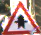

In [34]:
im_crop = image.crop((774,411,815,446))
im_crop

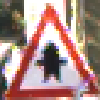

In [35]:
i = im_crop.resize((100, 100))
i

In [37]:
# Define paths
gt_file = r"D:\DEEPRA_096\FullIJCNN2013\FullIJCNN2013\gt.csv"
output_dir = r"D:\DEEPRA_096\FullIJCNN2013\FullIJCNN2013\cropped_images"

# Load ground truth data
ground_truth = pd.read_csv(gt_file, header=None)

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate over each row in the ground truth file
for index, row in ground_truth.iterrows():
    # Extract image filename and ROI coordinates
    image_filename = row[0]
    left_col, top_row, right_col, bottom_row = row[1:5]
    
    # Construct full path to the image
    image_path = os.path.join(data_dir, image_filename)
    
    # Open the image
    image = Image.open(image_path)
    
    # Crop the image based on ROI coordinates
    cropped_image = image.crop((left_col, top_row, right_col, bottom_row))
    
    # Save the cropped image
    output_path = os.path.join(output_dir, image_filename)
    cropped_image.save(output_path)

print("Images cropped and saved successfully.")

Images cropped and saved successfully.


In [40]:
# Define paths
data_dir = r"D:\DEEPRA_096\FullIJCNN2013\FullIJCNN2013"
gt_file = r"D:\DEEPRA_096\FullIJCNN2013\FullIJCNN2013\gt.csv"
output_dir = r"D:\DEEPRA_096\cropped_images"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Read the ground truth file
ground_truth = pd.read_csv(gt_file, header=None)

# Iterate over the first 10 rows (images) in the ground truth file
for idx, row in ground_truth.iterrows():
    # Extract the image file name and ROI coordinates
    image_file = os.path.join(data_dir, row[0])
    left, top, right, bottom = int(row[1]), int(row[2]), int(row[3]), int(row[4])
    
    # Open the image
    image = Image.open(image_file)
    
    # Crop the image
    cropped_image = image.crop((left, top, right, bottom))
    
    # Save the cropped image
    output_file = os.path.join(output_dir, f"cropped_{idx}.png")
    cropped_image.save(output_file)
    
    # Print the cropped image
    print(f"Saved cropped image {idx}: {output_file}")

Saved cropped image 0: D:\DEEPRA_096\cropped_images\cropped_0.png
Saved cropped image 1: D:\DEEPRA_096\cropped_images\cropped_1.png
Saved cropped image 2: D:\DEEPRA_096\cropped_images\cropped_2.png
Saved cropped image 3: D:\DEEPRA_096\cropped_images\cropped_3.png
Saved cropped image 4: D:\DEEPRA_096\cropped_images\cropped_4.png
Saved cropped image 5: D:\DEEPRA_096\cropped_images\cropped_5.png
Saved cropped image 6: D:\DEEPRA_096\cropped_images\cropped_6.png
Saved cropped image 7: D:\DEEPRA_096\cropped_images\cropped_7.png
Saved cropped image 8: D:\DEEPRA_096\cropped_images\cropped_8.png
Saved cropped image 9: D:\DEEPRA_096\cropped_images\cropped_9.png
Saved cropped image 10: D:\DEEPRA_096\cropped_images\cropped_10.png
Saved cropped image 11: D:\DEEPRA_096\cropped_images\cropped_11.png
Saved cropped image 12: D:\DEEPRA_096\cropped_images\cropped_12.png
Saved cropped image 13: D:\DEEPRA_096\cropped_images\cropped_13.png
Saved cropped image 14: D:\DEEPRA_096\cropped_images\cropped_14.png


Saved cropped image 131: D:\DEEPRA_096\cropped_images\cropped_131.png
Saved cropped image 132: D:\DEEPRA_096\cropped_images\cropped_132.png
Saved cropped image 133: D:\DEEPRA_096\cropped_images\cropped_133.png
Saved cropped image 134: D:\DEEPRA_096\cropped_images\cropped_134.png
Saved cropped image 135: D:\DEEPRA_096\cropped_images\cropped_135.png
Saved cropped image 136: D:\DEEPRA_096\cropped_images\cropped_136.png
Saved cropped image 137: D:\DEEPRA_096\cropped_images\cropped_137.png
Saved cropped image 138: D:\DEEPRA_096\cropped_images\cropped_138.png
Saved cropped image 139: D:\DEEPRA_096\cropped_images\cropped_139.png
Saved cropped image 140: D:\DEEPRA_096\cropped_images\cropped_140.png
Saved cropped image 141: D:\DEEPRA_096\cropped_images\cropped_141.png
Saved cropped image 142: D:\DEEPRA_096\cropped_images\cropped_142.png
Saved cropped image 143: D:\DEEPRA_096\cropped_images\cropped_143.png
Saved cropped image 144: D:\DEEPRA_096\cropped_images\cropped_144.png
Saved cropped image 

Saved cropped image 249: D:\DEEPRA_096\cropped_images\cropped_249.png
Saved cropped image 250: D:\DEEPRA_096\cropped_images\cropped_250.png
Saved cropped image 251: D:\DEEPRA_096\cropped_images\cropped_251.png
Saved cropped image 252: D:\DEEPRA_096\cropped_images\cropped_252.png
Saved cropped image 253: D:\DEEPRA_096\cropped_images\cropped_253.png
Saved cropped image 254: D:\DEEPRA_096\cropped_images\cropped_254.png
Saved cropped image 255: D:\DEEPRA_096\cropped_images\cropped_255.png
Saved cropped image 256: D:\DEEPRA_096\cropped_images\cropped_256.png
Saved cropped image 257: D:\DEEPRA_096\cropped_images\cropped_257.png
Saved cropped image 258: D:\DEEPRA_096\cropped_images\cropped_258.png
Saved cropped image 259: D:\DEEPRA_096\cropped_images\cropped_259.png
Saved cropped image 260: D:\DEEPRA_096\cropped_images\cropped_260.png
Saved cropped image 261: D:\DEEPRA_096\cropped_images\cropped_261.png
Saved cropped image 262: D:\DEEPRA_096\cropped_images\cropped_262.png
Saved cropped image 

Saved cropped image 376: D:\DEEPRA_096\cropped_images\cropped_376.png
Saved cropped image 377: D:\DEEPRA_096\cropped_images\cropped_377.png
Saved cropped image 378: D:\DEEPRA_096\cropped_images\cropped_378.png
Saved cropped image 379: D:\DEEPRA_096\cropped_images\cropped_379.png
Saved cropped image 380: D:\DEEPRA_096\cropped_images\cropped_380.png
Saved cropped image 381: D:\DEEPRA_096\cropped_images\cropped_381.png
Saved cropped image 382: D:\DEEPRA_096\cropped_images\cropped_382.png
Saved cropped image 383: D:\DEEPRA_096\cropped_images\cropped_383.png
Saved cropped image 384: D:\DEEPRA_096\cropped_images\cropped_384.png
Saved cropped image 385: D:\DEEPRA_096\cropped_images\cropped_385.png
Saved cropped image 386: D:\DEEPRA_096\cropped_images\cropped_386.png
Saved cropped image 387: D:\DEEPRA_096\cropped_images\cropped_387.png
Saved cropped image 388: D:\DEEPRA_096\cropped_images\cropped_388.png
Saved cropped image 389: D:\DEEPRA_096\cropped_images\cropped_389.png
Saved cropped image 

Saved cropped image 505: D:\DEEPRA_096\cropped_images\cropped_505.png
Saved cropped image 506: D:\DEEPRA_096\cropped_images\cropped_506.png
Saved cropped image 507: D:\DEEPRA_096\cropped_images\cropped_507.png
Saved cropped image 508: D:\DEEPRA_096\cropped_images\cropped_508.png
Saved cropped image 509: D:\DEEPRA_096\cropped_images\cropped_509.png
Saved cropped image 510: D:\DEEPRA_096\cropped_images\cropped_510.png
Saved cropped image 511: D:\DEEPRA_096\cropped_images\cropped_511.png
Saved cropped image 512: D:\DEEPRA_096\cropped_images\cropped_512.png
Saved cropped image 513: D:\DEEPRA_096\cropped_images\cropped_513.png
Saved cropped image 514: D:\DEEPRA_096\cropped_images\cropped_514.png
Saved cropped image 515: D:\DEEPRA_096\cropped_images\cropped_515.png
Saved cropped image 516: D:\DEEPRA_096\cropped_images\cropped_516.png
Saved cropped image 517: D:\DEEPRA_096\cropped_images\cropped_517.png
Saved cropped image 518: D:\DEEPRA_096\cropped_images\cropped_518.png
Saved cropped image 

Saved cropped image 629: D:\DEEPRA_096\cropped_images\cropped_629.png
Saved cropped image 630: D:\DEEPRA_096\cropped_images\cropped_630.png
Saved cropped image 631: D:\DEEPRA_096\cropped_images\cropped_631.png
Saved cropped image 632: D:\DEEPRA_096\cropped_images\cropped_632.png
Saved cropped image 633: D:\DEEPRA_096\cropped_images\cropped_633.png
Saved cropped image 634: D:\DEEPRA_096\cropped_images\cropped_634.png
Saved cropped image 635: D:\DEEPRA_096\cropped_images\cropped_635.png
Saved cropped image 636: D:\DEEPRA_096\cropped_images\cropped_636.png
Saved cropped image 637: D:\DEEPRA_096\cropped_images\cropped_637.png
Saved cropped image 638: D:\DEEPRA_096\cropped_images\cropped_638.png
Saved cropped image 639: D:\DEEPRA_096\cropped_images\cropped_639.png
Saved cropped image 640: D:\DEEPRA_096\cropped_images\cropped_640.png
Saved cropped image 641: D:\DEEPRA_096\cropped_images\cropped_641.png
Saved cropped image 642: D:\DEEPRA_096\cropped_images\cropped_642.png
Saved cropped image 

Saved cropped image 747: D:\DEEPRA_096\cropped_images\cropped_747.png
Saved cropped image 748: D:\DEEPRA_096\cropped_images\cropped_748.png
Saved cropped image 749: D:\DEEPRA_096\cropped_images\cropped_749.png
Saved cropped image 750: D:\DEEPRA_096\cropped_images\cropped_750.png
Saved cropped image 751: D:\DEEPRA_096\cropped_images\cropped_751.png
Saved cropped image 752: D:\DEEPRA_096\cropped_images\cropped_752.png
Saved cropped image 753: D:\DEEPRA_096\cropped_images\cropped_753.png
Saved cropped image 754: D:\DEEPRA_096\cropped_images\cropped_754.png
Saved cropped image 755: D:\DEEPRA_096\cropped_images\cropped_755.png
Saved cropped image 756: D:\DEEPRA_096\cropped_images\cropped_756.png
Saved cropped image 757: D:\DEEPRA_096\cropped_images\cropped_757.png
Saved cropped image 758: D:\DEEPRA_096\cropped_images\cropped_758.png
Saved cropped image 759: D:\DEEPRA_096\cropped_images\cropped_759.png
Saved cropped image 760: D:\DEEPRA_096\cropped_images\cropped_760.png
Saved cropped image 

Saved cropped image 872: D:\DEEPRA_096\cropped_images\cropped_872.png
Saved cropped image 873: D:\DEEPRA_096\cropped_images\cropped_873.png
Saved cropped image 874: D:\DEEPRA_096\cropped_images\cropped_874.png
Saved cropped image 875: D:\DEEPRA_096\cropped_images\cropped_875.png
Saved cropped image 876: D:\DEEPRA_096\cropped_images\cropped_876.png
Saved cropped image 877: D:\DEEPRA_096\cropped_images\cropped_877.png
Saved cropped image 878: D:\DEEPRA_096\cropped_images\cropped_878.png
Saved cropped image 879: D:\DEEPRA_096\cropped_images\cropped_879.png
Saved cropped image 880: D:\DEEPRA_096\cropped_images\cropped_880.png
Saved cropped image 881: D:\DEEPRA_096\cropped_images\cropped_881.png
Saved cropped image 882: D:\DEEPRA_096\cropped_images\cropped_882.png
Saved cropped image 883: D:\DEEPRA_096\cropped_images\cropped_883.png
Saved cropped image 884: D:\DEEPRA_096\cropped_images\cropped_884.png
Saved cropped image 885: D:\DEEPRA_096\cropped_images\cropped_885.png
Saved cropped image 

Saved cropped image 991: D:\DEEPRA_096\cropped_images\cropped_991.png
Saved cropped image 992: D:\DEEPRA_096\cropped_images\cropped_992.png
Saved cropped image 993: D:\DEEPRA_096\cropped_images\cropped_993.png
Saved cropped image 994: D:\DEEPRA_096\cropped_images\cropped_994.png
Saved cropped image 995: D:\DEEPRA_096\cropped_images\cropped_995.png
Saved cropped image 996: D:\DEEPRA_096\cropped_images\cropped_996.png
Saved cropped image 997: D:\DEEPRA_096\cropped_images\cropped_997.png
Saved cropped image 998: D:\DEEPRA_096\cropped_images\cropped_998.png
Saved cropped image 999: D:\DEEPRA_096\cropped_images\cropped_999.png
Saved cropped image 1000: D:\DEEPRA_096\cropped_images\cropped_1000.png
Saved cropped image 1001: D:\DEEPRA_096\cropped_images\cropped_1001.png
Saved cropped image 1002: D:\DEEPRA_096\cropped_images\cropped_1002.png
Saved cropped image 1003: D:\DEEPRA_096\cropped_images\cropped_1003.png
Saved cropped image 1004: D:\DEEPRA_096\cropped_images\cropped_1004.png
Saved crop

Saved cropped image 1110: D:\DEEPRA_096\cropped_images\cropped_1110.png
Saved cropped image 1111: D:\DEEPRA_096\cropped_images\cropped_1111.png
Saved cropped image 1112: D:\DEEPRA_096\cropped_images\cropped_1112.png
Saved cropped image 1113: D:\DEEPRA_096\cropped_images\cropped_1113.png
Saved cropped image 1114: D:\DEEPRA_096\cropped_images\cropped_1114.png
Saved cropped image 1115: D:\DEEPRA_096\cropped_images\cropped_1115.png
Saved cropped image 1116: D:\DEEPRA_096\cropped_images\cropped_1116.png
Saved cropped image 1117: D:\DEEPRA_096\cropped_images\cropped_1117.png
Saved cropped image 1118: D:\DEEPRA_096\cropped_images\cropped_1118.png
Saved cropped image 1119: D:\DEEPRA_096\cropped_images\cropped_1119.png
Saved cropped image 1120: D:\DEEPRA_096\cropped_images\cropped_1120.png
Saved cropped image 1121: D:\DEEPRA_096\cropped_images\cropped_1121.png
Saved cropped image 1122: D:\DEEPRA_096\cropped_images\cropped_1122.png
Saved cropped image 1123: D:\DEEPRA_096\cropped_images\cropped_1

In [41]:
# Define paths
output_dir_resized = r"D:\DEEPRA_096\FullIJCNN2013\FullIJCNN2013\resized_images"

# Create output directory if it doesn't exist
os.makedirs(output_dir_resized, exist_ok=True)

# Initialize empty lists for features and labels
features = []
labels = []

# Resize images and convert to numpy arrays
for idx, row in ground_truth.iterrows():
    image_filename = row[0]
    left_col, top_row, right_col, bottom_row = row[1:5]

    image_path = os.path.join(data_dir, image_filename)
    image = Image.open(image_path)

    # Crop and resize image
    cropped_image = image.crop((left_col, top_row, right_col, bottom_row))
    resized_image = cropped_image.resize((30, 30))

    # Convert resized image to numpy array
    image_array = np.array(resized_image)
    features.append(image_array.flatten())  # Flatten the 2D array to 1D
    labels.append(row[5])  # Class ID

    # Save resized image (optional)
    resized_image.save(os.path.join(output_dir_resized, image_filename))

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)

print("Resized images to (30, 30) and converted to numpy arrays.")
print("X shape:", X.shape)
print("y shape:", y.shape)

Resized images to (30, 30) and converted to numpy arrays.
X shape: (1213, 2700)
y shape: (1213,)


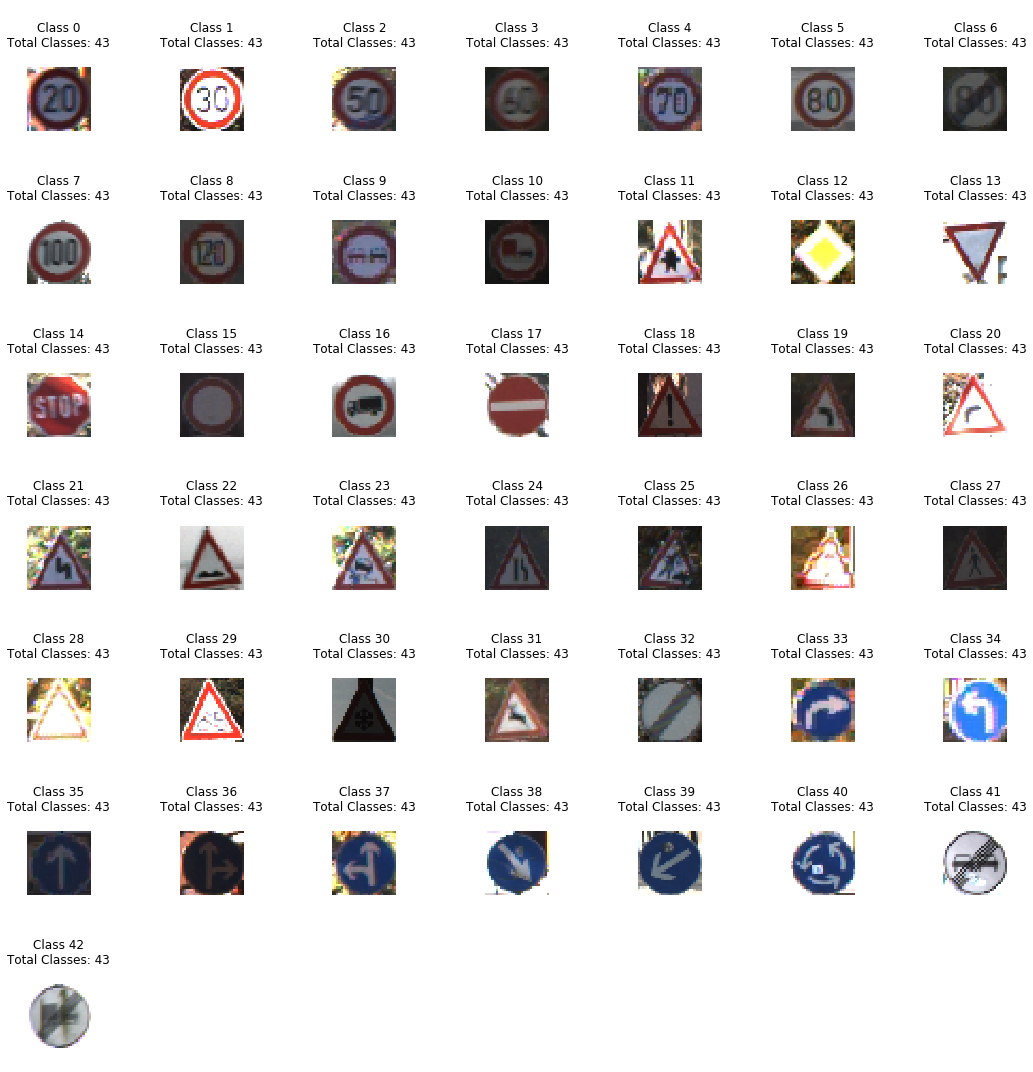

In [69]:
import math

# Calculate the number of rows and columns for the grid
num_classes = len(classes)
rows = int(math.ceil(num_classes / 7))
cols = min(num_classes, 7)

# Plot the sample images in a grid
fig, axs = plt.subplots(rows, cols, figsize=(15, 15))

for i, class_id in enumerate(classes):
    row = i // 7
    col = i % 7
    class_images = X[y == class_id]
    sample_image = class_images[0].reshape(30, 30, 3)  # Reshape back to 30x30x3 for RGB image
    axs[row, col].imshow(sample_image)
    axs[row, col].set_title(f"\nClass {class_id}\nTotal Classes: {len(classes)}\n")
    axs[row, col].axis('off')

# Remove empty subplots
for i in range(num_classes, rows * cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

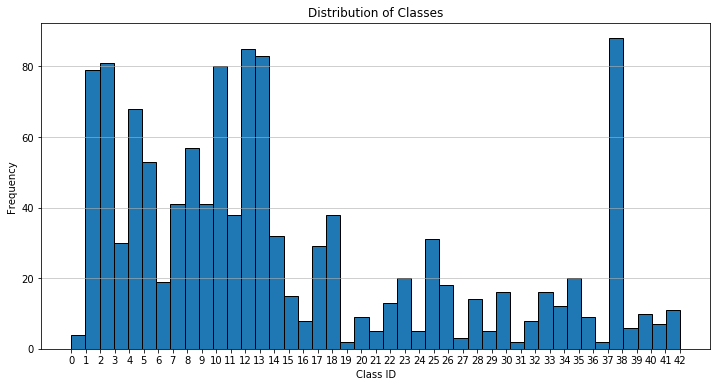

In [47]:
# Plot the distribution of classes

plt.figure(figsize=(12, 6))
plt.hist(y, bins=len(classes), Edgecolor='black')
plt.xticks(classes)
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.grid(axis='y', alpha=0.75)
plt.show()

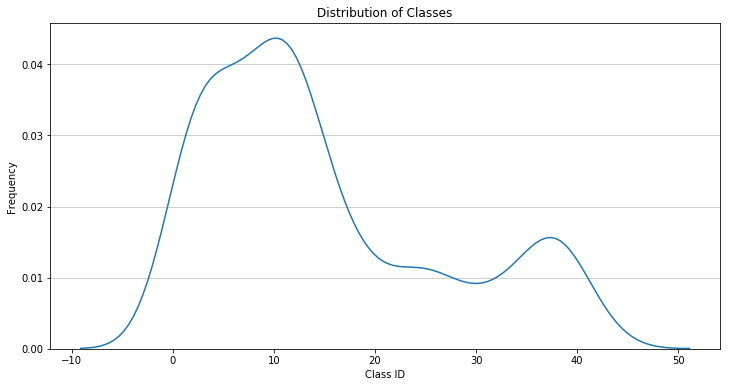

In [71]:
plt.figure(figsize=(12, 6))
sns.kdeplot(y)
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.grid(axis='y', alpha=0.75)
plt.show()